## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [94]:
import pandas as pd
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [95]:
df.isnull().sum()

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

Получается, пропусков нет

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    object 
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    object 
 14  GamesSpendingTime     235 non-null    object 
 15  TravellingTime        2

In [97]:
df['CareerBasedonDegree'].apply(type).value_counts() 

<class 'str'>    235
Name: CareerBasedonDegree, dtype: int64

Я уже один раз переводила колонку к числовому типу, воспользуюсь похожим кодом, написав функцию.

In [98]:
def fixing(x):
    if isinstance(x, str):
        x = x.replace('%', '')
        x = pd.to_numeric(x)
        x = x/100
    return(x)

In [99]:
df['CareerBasedonDegree'] = df['CareerBasedonDegree'].apply(fixing)

In [100]:
df

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,0.50,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,0.75,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,0.50,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,0.50,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,0.25,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,0.50,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,0.75,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,0.50,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,0.75,More than 2 hour,2.30 - 3 hour,Awful,good,No


Я решила перевести колонку CareerBasedonDegree в тип float, тк изначальные данные были в процентах, а проценты без значка "%" записываются в виде десятичных дробей

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [101]:
df.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CareerBasedonDegree', 'GamesSpendingTime',
       'TravellingTime ', 'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

сначала я хотела вывести все названия колонок, чтобы было удобнее писать код просто скопировав названия нужных колонок, но случайно заметила, что в некоторых из них после названия стоит пробел (например, в 'TravellingTime '). Подозреваю, что такое неожиданное "открытие" сэкономило мне время, иначе я бы сидела и думала "да почему код не работает". Ну, работаем.

с Time встречаются колонки 'DailyStudingTime', 'GamesSpendingTime', 'TravellingTime '. Какого-то универсального кода, который выводил только левую границу я не придумала, поэтому буду действовать по тупому

In [102]:
df['DailyStudingTime'].unique()


array(['0 - 30 minute', '30 - 60 minute', '1 - 2 Hour', '2 - 3 hour',
       '3 - 4 hour', 'More Than 4 hour'], dtype=object)

In [103]:
df['minDailyStudingTime'] = df['DailyStudingTime'].replace('0 - 30 minute', value=0)
df['minDailyStudingTime'] = df['minDailyStudingTime'].replace('30 - 60 minute', value=30)
df['minDailyStudingTime'] = df['minDailyStudingTime'].replace('1 - 2 Hour', value=1*60)
df['minDailyStudingTime'] = df['minDailyStudingTime'].replace( '2 - 3 hour', value = 2*60)
df['minDailyStudingTime'] = df['minDailyStudingTime'].replace('3 - 4 hour', value = 3*60)
df['minDailyStudingTime'] = df['minDailyStudingTime'].replace('More Than 4 hour', value = 4*60)

In [104]:
df['minDailyStudingTime'].unique()

array([  0,  30,  60, 120, 180, 240], dtype=int64)

In [105]:
df['GamesSpendingTime'].unique()

array(['1.30 - 2 hour', '1 - 1.30 hour', 'More than 2 hour',
       '30 - 60 Minute', '1 - 30 Minute', '0 Minute'], dtype=object)

In [106]:
df['minGamesSpendingTime'] = df['GamesSpendingTime'].replace('1.30 - 2 hour', value = 60+30)
df['minGamesSpendingTime'] = df['minGamesSpendingTime'].replace('1 - 1.30 hour', value = 1*60)
df['minGamesSpendingTime'] = df['minGamesSpendingTime'].replace('More than 2 hour', value = 2*60)
df['minGamesSpendingTime'] = df['minGamesSpendingTime'].replace( '30 - 60 Minute', value = 30)
df['minGamesSpendingTime'] = df['minGamesSpendingTime'].replace('1 - 30 Minute', value = 1)
df['minGamesSpendingTime'] = df['minGamesSpendingTime'].replace('0 Minute', value = 0)

In [107]:
df['minGamesSpendingTime'].unique()

array([ 90,  60, 120,  30,   1,   0], dtype=int64)

In [108]:
df['TravellingTime '].unique()

array(['30 - 60 minutes', '0 - 30 minutes', '1 - 1.30 hour',
       '2 - 2.30 hour', '1.30 - 2 hour', 'more than 3 hour',
       '2.30 - 3 hour'], dtype=object)

In [109]:
df['minTravellingTime'] = df['TravellingTime '].replace('30 - 60 minutes', value = 30)
df['minTravellingTime'] = df['minTravellingTime'].replace('0 - 30 minutes', value = 0)
df['minTravellingTime'] = df['minTravellingTime'].replace('1 - 1.30 hour', value = 60)
df['minTravellingTime'] = df['minTravellingTime'].replace('2 - 2.30 hour', value = 2*60)
df['minTravellingTime'] = df['minTravellingTime'].replace('1.30 - 2 hour', value = 60+30)
df['minTravellingTime'] = df['minTravellingTime'].replace('more than 3 hour', value = 3*60)
df['minTravellingTime'] = df['minTravellingTime'].replace('2.30 - 3 hour', value = 2*60+30)

In [110]:
df['minTravellingTime'].unique()

array([ 30,   0,  60, 120,  90, 180, 150], dtype=int64)

In [111]:
df.drop('DailyStudingTime', inplace = True, axis = 1)
df.drop('GamesSpendingTime', inplace = True, axis = 1)
df.drop('TravellingTime ', inplace = True, axis = 1)

In [112]:
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,StressLevel,FinancialStatus,PartTimeJob?,minDailyStudingTime,minGamesSpendingTime,minTravellingTime
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,Morning,40000,No,0.50,Bad,Bad,No,0,90,30
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,Morning,15000,Yes,0.75,Bad,Bad,No,30,60,0
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,Anytime,13000,Yes,0.50,Awful,Bad,No,60,120,30
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,Anytime,1500000,No,0.50,Bad,good,No,60,90,0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,Morning,50000,Yes,0.25,Good,good,No,30,90,30


Итак, три новых колонки созданы, минимальные значения переведены в минуты, старые колонки удалены. Джаст ин кейс я не стала переводить новые колонки в тип str, оставила в int.

**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   PreferToStudyIn       235 non-null    object 
 10  SalaryExpectation     235 non-null    int64  
 11  LikeDegree            235 non-null    object 
 12  CareerBasedonDegree   235 non-null    float64
 13  StressLevel           235 non-null    object 
 14  FinancialStatus       235 non-null    object 
 15  PartTimeJob?          2

In [114]:
df.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'PreferToStudyIn', 'SalaryExpectation', 'LikeDegree',
       'CareerBasedonDegree', 'StressLevel ', 'FinancialStatus',
       'PartTimeJob?', 'minDailyStudingTime', 'minGamesSpendingTime',
       'minTravellingTime'],
      dtype='object')

Для удобства создам список из непрерывных переменных

In [115]:
X = ['Height(CM)',
     'Weight(KG)',
     '10Mark',
     '12Mark',
     'CollegeMark',
     'SalaryExpectation',
     'CareerBasedonDegree',
     'minDailyStudingTime',
     'minGamesSpendingTime',
     'minTravellingTime'
    ]

Вот тут я не уверена, потому что с одной стороны некоторые признаки принимают ограниченное количество значений (как минимум признаки с суффиксом time), но я предполагаю, что в целом это непрерывные величины, просто у нас вот такая выборка, поэтому их я также взяла для рассмотрения

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

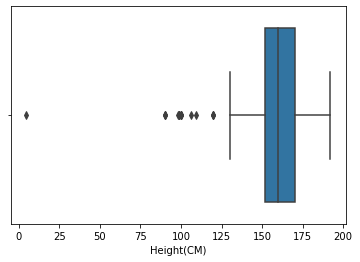

In [116]:
import warnings
sns.boxplot(df['Height(CM)'])
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Weight(KG)'>

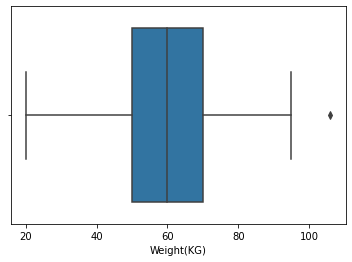

In [117]:
sns.boxplot(df['Weight(KG)'])

<AxesSubplot:xlabel='10Mark'>

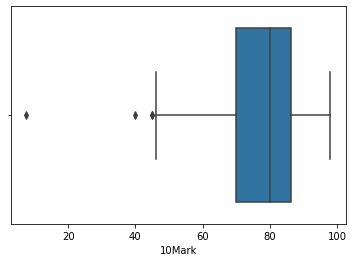

In [118]:
sns.boxplot(df['10Mark'])

<AxesSubplot:xlabel='12Mark'>

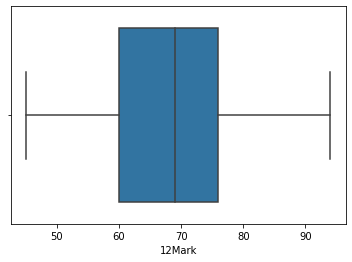

In [119]:
sns.boxplot(df['12Mark'])

<AxesSubplot:xlabel='CollegeMark'>

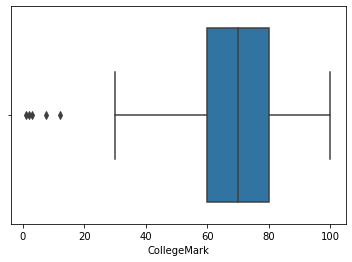

In [120]:
sns.boxplot(df['CollegeMark'])

<AxesSubplot:xlabel='SalaryExpectation'>

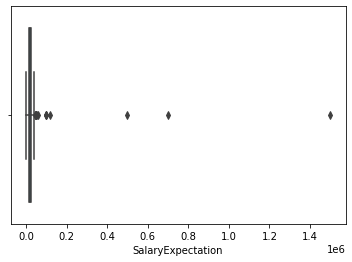

In [121]:
sns.boxplot(df['SalaryExpectation'])

<AxesSubplot:xlabel='CareerBasedonDegree'>

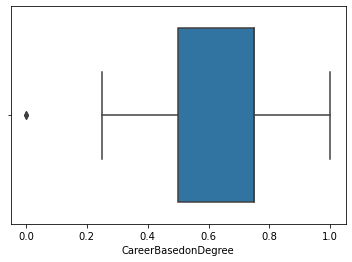

In [122]:
sns.boxplot(df['CareerBasedonDegree'])

<AxesSubplot:xlabel='minDailyStudingTime'>

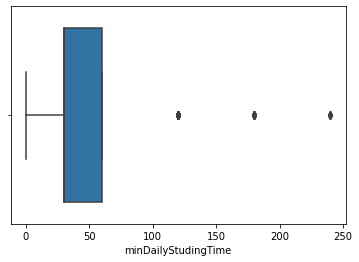

In [123]:
sns.boxplot(df['minDailyStudingTime'])

<AxesSubplot:xlabel='minGamesSpendingTime'>

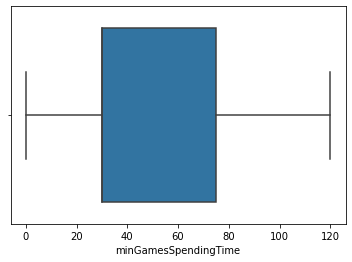

In [124]:
sns.boxplot(df['minGamesSpendingTime'])

<AxesSubplot:xlabel='minTravellingTime'>

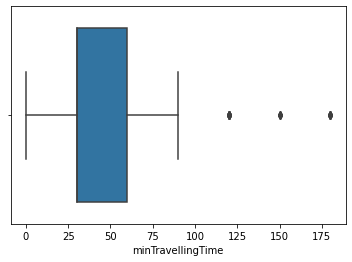

In [125]:
sns.boxplot(df['minTravellingTime'])

По графикам видно, что выбросы есть почти в каждом из признаков

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

In [126]:
import matplotlib as plt
import seaborn as sns

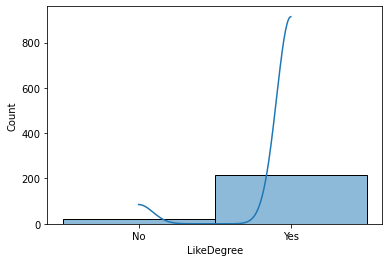

In [127]:
sns.histplot(df['LikeDegree'], kde = True);

In [128]:
df['LikeDegree'].value_counts()

Yes    215
No      20
Name: LikeDegree, dtype: int64

Как можно увидеть график и сумма по уникальным значениям показали, что целевая переменная распределена ненормально. В ней присутствует всего два значения - Yes и No (это биноминальное распределение, можно перевести в дамми переменную и ответы будут 0 или 1), при этом замечу, что "нет" составляет менее 10% от всех значений. Из-за такого дисбаланса в количестве значений не стоит пользоваться метрикой accuracy так она будет очень плохо работать с предсказанием результатов "нет" (информацию про минусы данной метрики мы проходили на семинаре, а еще я дополнительно почитала про нее вот тут https://habr.com/ru/company/ods/blog/328372/)
Помимо accuracy мы также проходили метрики precision, recall и F-меру, они подходят для работы с несбалансированными данными, ими и буду далее пользоваться

**Задание 8.**  Переведите целевую переменную к численному формату.

In [129]:
df['LikeDegree'] = df['LikeDegree'].map({'No':0, 'Yes':1})
df['LikeDegree'].unique()

array([0, 1], dtype=int64)

просто воспользовалась кодом, который у нас уже был и в семинаре и в прошлой домашке

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [133]:
y = df['LikeDegree']

In [135]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=201905, stratify=df['LikeDegree'])

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

Пусть наивной моделью будет "все студенты довольны" (1), тогда

In [137]:
import numpy as np

In [141]:
y_pred_naive = 1 * np.ones(len(test))
y_pred_naive

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [150]:
X_train = train[X].to_numpy()
X_test = test[X].to_numpy()
y_train = train.LikeDegree.to_numpy()
y_test = test.LikeDegree.to_numpy()

In [152]:
from sklearn.neighbors import KNeighborsClassifier

knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)

y_pred_knn_3 = knn_3.predict(X_test)
y_pred_knn_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [153]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)

y_pred_knn_5 = knn_5.predict(X_test)
y_pred_knn_5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [154]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)

y_pred_knn_7 = knn_7.predict(X_test)
y_pred_knn_7

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

Построила модели для 3, 5, 7 близжайших соседей

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [155]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [163]:
precision_naive = precision_score(y_test, y_pred_naive)
recall_naive = recall_score(y_test, y_pred_naive)
f1_naive = f1_score(y_test, y_pred_naive)
print(precision_naive, recall_naive, f1_naive)

0.9148936170212766 1.0 0.9555555555555556


In [160]:
precision_3 = precision_score(y_test, y_pred_knn_3)
recall_3 = recall_score(y_test, y_pred_knn_3)
f1_3 = f1_score(y_test, y_pred_knn_3)
print(precision_3, recall_3, f1_3)

0.9148936170212766 1.0 0.9555555555555556


In [161]:
precision_5 = precision_score(y_test, y_pred_knn_5)
recall_5 = recall_score(y_test, y_pred_knn_5)
f1_5 = f1_score(y_test, y_pred_knn_5)
print(precision_5, recall_5, f1_5)

0.9148936170212766 1.0 0.9555555555555556


In [162]:
precision_7 = precision_score(y_test, y_pred_knn_7)
recall_7 = recall_score(y_test, y_pred_knn_7)
f1_7 = f1_score(y_test, y_pred_knn_7)
print(precision_7, recall_7, f1_7)

0.9148936170212766 1.0 0.9555555555555556


По итогу значения всех метрик одинаковы между собой, что говорит о том, что модели предсказывают с одинаковой точностью, нельзя выбрать какую-то наиболее эффективную.

**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( )
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [165]:
knn_3_scal = KNeighborsClassifier(n_neighbors = 3)
knn_3_scal.fit(X_train_norm, y_train)

y_pred_knn_3_scal = knn_3.predict(X_test_norm)
print(y_pred_knn_3_scal)

precision_3_scal = precision_score(y_test, y_pred_knn_3_scal)
recall_3_scal = recall_score(y_test, y_pred_knn_3_scal)
f1_3_scal = f1_score(y_test, y_pred_knn_3_scal)
print(precision_3_scal, recall_3_scal, f1_3_scal)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [166]:
knn_5_scal = KNeighborsClassifier(n_neighbors = 5)
knn_5_scal.fit(X_train_norm, y_train)

y_pred_knn_5_scal = knn_5.predict(X_test_norm)
print(y_pred_knn_5_scal)

precision_5_scal = precision_score(y_test, y_pred_knn_5_scal)
recall_5_scal = recall_score(y_test, y_pred_knn_5_scal)
f1_5_scal = f1_score(y_test, y_pred_knn_5_scal)
print(precision_5_scal, recall_5_scal, f1_5_scal)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [167]:
knn_7_scal = KNeighborsClassifier(n_neighbors = 7)
knn_7_scal.fit(X_train_norm, y_train)

y_pred_knn_7_scal = knn_7.predict(X_test_norm)
print(y_pred_knn_7_scal)

precision_7_scal = precision_score(y_test, y_pred_knn_7_scal)
recall_7_scal = recall_score(y_test, y_pred_knn_7_scal)
f1_7_scal = f1_score(y_test, y_pred_knn_7_scal)
print(precision_7_scal, recall_7_scal, f1_7_scal)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


Вообще ничего абсолютно не изменилось... Опять нельзя выбрать "лучшую" модель

**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [168]:
train[X] = train[X].apply(lambda n: np.log(n + 1))
test[X] = test[X].apply(lambda n: np.log(n + 1))
X_train = train[X].to_numpy()
X_test = test[X].to_numpy()

Избавились с помощью логарифмирования, данный прием мы изучали на семинаре

P.S. я решила перезаписать в трейн и тест, потому что ~~мне было лень создавать еще новые переменные, их и так уже слишком много~~ я подумала так будет удобнее ориентироватся в работе

In [172]:
knn_3.fit(X_train, y_train)

y_pred_knn_3 = knn_3.predict(X_test)
print(y_pred_knn_3)

precision_3 = precision_score(y_test, y_pred_knn_3)
recall_3 = recall_score(y_test, y_pred_knn_3)
f1_3 = f1_score(y_test, y_pred_knn_3)
print(precision_3, recall_3, f1_3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [173]:
knn_5.fit(X_train, y_train)

y_pred_knn_5 = knn_5.predict(X_test)
print(y_pred_knn_5)

precision_5 = precision_score(y_test, y_pred_knn_5)
recall_5 = recall_score(y_test, y_pred_knn_5)
f1_5 = f1_score(y_test, y_pred_knn_5)
print(precision_5, recall_5, f1_5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [174]:
knn_7.fit(X_train, y_train)

y_pred_knn_7 = knn_7.predict(X_test)
print(y_pred_knn_7)

precision_7 = precision_score(y_test, y_pred_knn_7)
recall_7 = recall_score(y_test, y_pred_knn_7)
f1_7 = f1_score(y_test, y_pred_knn_7)
print(precision_7, recall_7, f1_7)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


Мда, вообще абсолютно ничего прям совсем нигде не изменилось и не улучшилось.
Наверное, так произошло из-за неудачного разбиения на трейн и тест, но it is what it is

**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

В моем случае абсолютно никакая конфигурация модели себя лучше не показала, поэтому, к сожалению, я не могу ответить на данные вопросы. Могу предположить, что при другом раскладе событий конфигурация модели (а какой точно, с 3, 5 или 7 соседями сказать не могу) с очищеными выбросами была бы лучше, так как исчезли бы "помехи" в решении. На самом деле обидно, что так получилось, потому что мне было интересно посмотреть на изменения и подумать над ними.

P.S. В данной работе я практически не пользовалась кодами из интернета, только гуглила синтаксис функций, так как мы практически все разбирали на семинарах, а что не разбирали я сама уже делала, так что ссылок на доп ресурсы нет

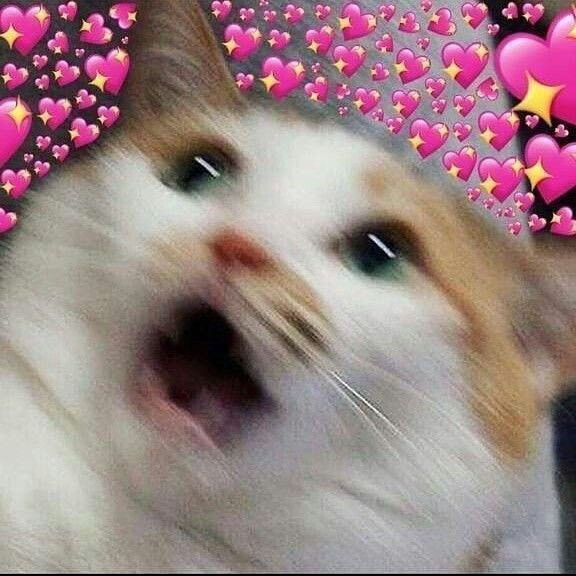

удачной сессии, здоровья, крепкого сна, большой зарплаты и вообще всего самого наилучшего🥰🥰🥰